In [10]:
target_rd = 3000

import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
print(df_cd8.shape)
print(df_cd4.shape)
df_cd8

(347702, 7)
(307895, 6)


,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
P1-AAAGCAAGTTATCCGA-1,0.388047,0.357598,0.209754,0.545284,0.924697,1.330269,0.225775
P1-AACCGCGGTCAACATC-1,0.217013,0.084352,-0.088640,0.152241,0.346335,1.428823,0.578507
P1-AACGTTGGTCGGCTCA-1,0.562264,0.449989,0.346789,0.607290,0.764859,2.151718,0.259114
P1-ACACCGGGTTCAGCGC-1,0.185942,0.073867,-0.120624,0.087692,0.279889,2.066231,0.300061
P1-ACACCGGTCTCTGTCG-1,0.436115,0.415232,0.237969,0.553128,0.582581,1.340220,0.131251
...,...,...,...,...,...,...,...
P97-TTGAACGCATTAGGCT-1,0.414399,0.168528,-0.009371,0.263127,0.528017,2.091699,0.177715
P97-TTGTAGGAGGATGCGT-1,0.264182,0.098222,-0.020643,0.071983,0.410903,1.436597,0.173334
P97-TTTGCGCTCAGTTCGA-1,0.378257,0.197191,0.042017,0.267101,0.542824,2.131982,0.281183
P97-TTTGGTTAGGGTCTCC-1,0.390537,0.267463,0.129344,0.336162,0.649118,1.600566,0.226755


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "CD4_ave_Hanada_pos_9g", 
    "CD4_Caushi_Tfh2_66g", 
    "CD4_Lowery_pos_40g", 
    "CD4_Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4_Lowery_neg_37g", 
    "CD4_ave_Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):

    # z‐score the signatures _within_ this subset
    z_pos = df[pos_sigs].apply(zscore)
    z_neg = df[neg_sigs].apply(zscore)

    # compute mean “pos” and “neg” scores
    df[f"pos_score_{cell_type}"] = z_pos.mean(axis=1)
    df[f"neg_score_{cell_type}"] = z_neg.mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = df[f"pos_score_{cell_type}"].median()
    neg_cut = df[f"neg_score_{cell_type}"].median()

    # classify per cell
    df[f"cancer_reactive_per_cell_{cell_type}"] = (
        (df[f"pos_score_{cell_type}"] >  pos_cut) &
        (df[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return df, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)

cd8_called['cell_type'] = 'CD8'
cd4_called['cell_type'] = 'CD4'
cd8_called

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cell_type
P1-AAAGCAAGTTATCCGA-1,0.388047,0.357598,0.209754,0.545284,0.924697,1.330269,0.225775,1.598373,-0.347622,True,CD8
P1-AACCGCGGTCAACATC-1,0.217013,0.084352,-0.088640,0.152241,0.346335,1.428823,0.578507,-0.851059,1.338838,False,CD8
P1-AACGTTGGTCGGCTCA-1,0.562264,0.449989,0.346789,0.607290,0.764859,2.151718,0.259114,2.262165,0.726441,False,CD8
P1-ACACCGGGTTCAGCGC-1,0.185942,0.073867,-0.120624,0.087692,0.279889,2.066231,0.300061,-1.140053,0.813053,False,CD8
P1-ACACCGGTCTCTGTCG-1,0.436115,0.415232,0.237969,0.553128,0.582581,1.340220,0.131251,1.525625,-0.758597,True,CD8
...,...,...,...,...,...,...,...,...,...,...,...
P97-TTGAACGCATTAGGCT-1,0.414399,0.168528,-0.009371,0.263127,0.528017,2.091699,0.177715,0.161215,0.295282,False,CD8
P97-TTGTAGGAGGATGCGT-1,0.264182,0.098222,-0.020643,0.071983,0.410903,1.436597,0.173334,-0.684533,-0.462096,False,CD8
P97-TTTGCGCTCAGTTCGA-1,0.378257,0.197191,0.042017,0.267101,0.542824,2.131982,0.281183,0.240997,0.802787,False,CD8
P97-TTTGGTTAGGGTCTCC-1,0.390537,0.267463,0.129344,0.336162,0.649118,1.600566,0.226755,0.735220,-0.038821,False,CD8


In [12]:
cd4_called

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4
P1-AAACCTGGTTGGAGGT-1,0.050863,0.419602,0.130616,-0.129579,0.573524,1.498667,-0.558390,0.358569,False,CD4
P1-AAACCTGTCTGCTTGC-1,0.038794,0.406970,0.092806,-0.166732,0.815158,1.999034,-0.481613,0.869579,False,CD4
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4
P1-AAAGTAGGTAGGGTAC-1,0.006306,0.523353,0.097111,-0.070264,0.725720,1.804415,-0.432870,1.124728,False,CD4
...,...,...,...,...,...,...,...,...,...,...
P97-ATAACGCGTCCAGTAT-1,0.177796,0.560361,0.359945,-0.098457,0.671293,0.994602,0.239785,0.365140,False,CD4
P97-CTGATCCAGGCGTACA-1,0.275083,0.646335,0.536518,0.002940,0.901648,1.876404,1.158074,1.706439,False,CD4
P97-GCACATAAGCCACCTG-1,0.133678,0.567088,0.397174,0.032556,0.862867,2.099148,0.671679,1.634122,False,CD4
P97-GCCAAATCAAACGCGA-1,0.316659,0.637442,0.477097,-0.066482,0.758676,1.543396,0.850161,1.295903,False,CD4


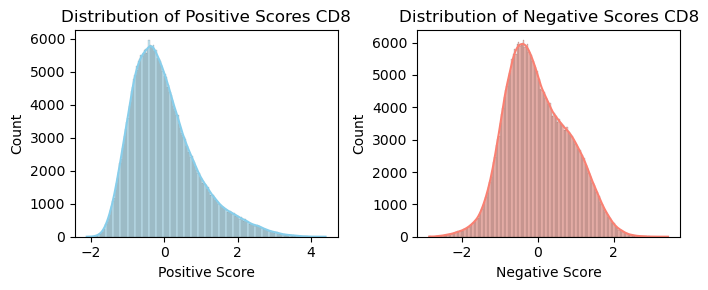

In [13]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

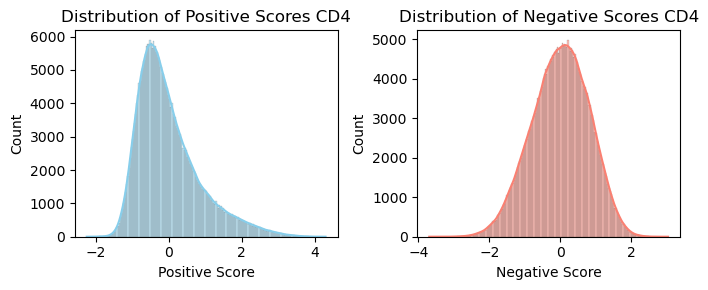

In [14]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

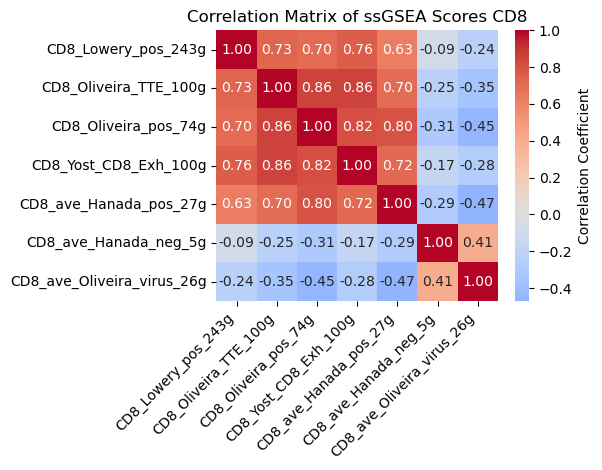

In [15]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

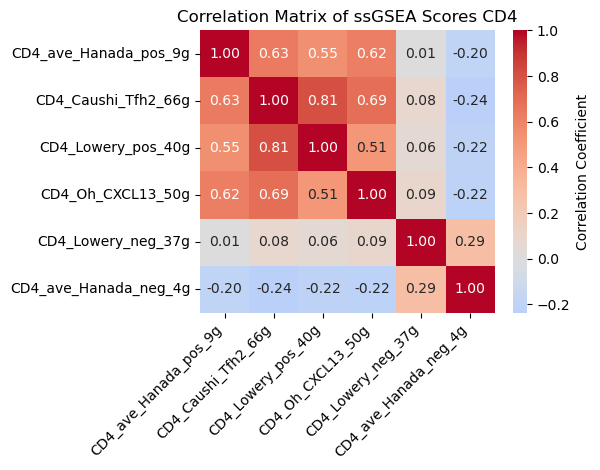

In [16]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [17]:
import pickle
with open("../data/signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("../data/signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [18]:
import pandas as pd
import scanpy as sc
import numpy as np
features = pd.read_csv("GSE243013_genes.csv.gz")
barcodes = pd.read_csv("GSE243013_barcodes.csv.gz")

from scipy.io import mmread

import gzip
with gzip.open("GSE243013_NSCLC_immune_scRNA_counts.mtx.gz", 'rb') as f:
    counts = mmread(f).tocsr() 

print(counts.shape)
print(features.shape)
print(barcodes.shape)
print(features.head())
print(barcodes.head())

(1254749, 31831)
(31831, 1)
(1254749, 1)
    geneSymbol
0  MIR1302-2HG
1   AL627309.1
2   AL627309.3
3   AL627309.2
4   AL627309.4
                   barcode
0  P266-ACACCAAAGGCACATG-1
1  P266-GGGCATCTCGTCACGG-1
2  P266-GTGCTTCCATGATCCA-1
3  P266-GGAAAGCGTATAATGG-1
4  P266-CACAGTAAGCCCAGCT-1


In [19]:
metadata = pd.read_csv("GSE243013_NSCLC_immune_scRNA_metadata.csv.gz")
print(metadata.shape)
metadata

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_89579/3134555185.py:1: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("GSE243013_NSCLC_immune_scRNA_metadata.csv.gz")


(1254749, 23)


,sampleID,cellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,major_cell_type,sub_cell_type,total_counts_rb,...,smoking_history,cancer_type,pre_treatment_staging,anti-PD1_therapy,chemotherapy,targeted_therapy,cycles,pathological_response,pathological_response_rate,radiological_response
0,P266,P266-ACACCAAAGGCACATG-1,1048,1048,2025.0,23.0,1.135803,T/NK cell,CD8T_Tem_GZMK+GZMH+,431.0,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
1,P266,P266-GGGCATCTCGTCACGG-1,827,827,1435.0,23.0,1.602788,T/NK cell,CD4T_Tm_ANXA1,198.0,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
2,P266,P266-GTGCTTCCATGATCCA-1,1254,1254,2441.0,81.0,3.318312,T/NK cell,CD4T_Tfh_CXCL13,554.0,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
3,P266,P266-GGAAAGCGTATAATGG-1,967,967,1602.0,38.0,2.372035,T/NK cell,CD8T_Tem_GZMK+GZMH+,200.0,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
4,P266,P266-CACAGTAAGCCCAGCT-1,1211,1211,2139.0,53.0,2.477794,T/NK cell,NK_CD16hi_FGFBP2,282.0,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254744,P159,P159-CATCCACCATGTTCCC-1,2192,2192,6506.0,239.0,3.673532,T/NK cell,NK_CD16hi_FGFBP2,1636.0,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
1254745,P159,P159-TGTATTCGTATCGCAT-1,1869,1869,5544.0,57.0,1.028139,T/NK cell,CD4T_Tm_ANXA1,1580.0,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
1254746,P159,P159-ATGCGATTCTTCGAGA-1,1940,1940,5715.0,68.0,1.189851,T/NK cell,CD4T_Tn_CCR7,1969.0,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
1254747,P159,P159-CCAGCGATCGGTTAAC-1,2179,2179,5654.0,143.0,2.529183,T/NK cell,CD8T_Tm_IL7R,1367.0,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm


In [20]:
import anndata
var = pd.DataFrame(index=features['geneSymbol'].tolist())
obs = pd.DataFrame(index=barcodes['barcode'].tolist())

# Create AnnData
adata = anndata.AnnData(X=counts, obs=obs, var=var)
adata

adata.var["gene_name"] = features["geneSymbol"].values


In [21]:
adata.obs = adata.obs.join(metadata.set_index('cellID'))
adata.obs

,sampleID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,major_cell_type,sub_cell_type,total_counts_rb,pct_counts_rb,...,smoking_history,cancer_type,pre_treatment_staging,anti-PD1_therapy,chemotherapy,targeted_therapy,cycles,pathological_response,pathological_response_rate,radiological_response
P266-ACACCAAAGGCACATG-1,P266,1048,1048,2025.0,23.0,1.135803,T/NK cell,CD8T_Tem_GZMK+GZMH+,431.0,21.283950,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
P266-GGGCATCTCGTCACGG-1,P266,827,827,1435.0,23.0,1.602788,T/NK cell,CD4T_Tm_ANXA1,198.0,13.797909,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
P266-GTGCTTCCATGATCCA-1,P266,1254,1254,2441.0,81.0,3.318312,T/NK cell,CD4T_Tfh_CXCL13,554.0,22.695616,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
P266-GGAAAGCGTATAATGG-1,P266,967,967,1602.0,38.0,2.372035,T/NK cell,CD8T_Tem_GZMK+GZMH+,200.0,12.484395,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
P266-CACAGTAAGCCCAGCT-1,P266,1211,1211,2139.0,53.0,2.477794,T/NK cell,NK_CD16hi_FGFBP2,282.0,13.183731,...,Y,LUAD,IIB,Camrelizumab,Carboplatin + Abraxane,No,3,non-MPR,0.05,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P159-CATCCACCATGTTCCC-1,P159,2192,2192,6506.0,239.0,3.673532,T/NK cell,NK_CD16hi_FGFBP2,1636.0,25.146019,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
P159-TGTATTCGTATCGCAT-1,P159,1869,1869,5544.0,57.0,1.028139,T/NK cell,CD4T_Tm_ANXA1,1580.0,28.499279,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
P159-ATGCGATTCTTCGAGA-1,P159,1940,1940,5715.0,68.0,1.189851,T/NK cell,CD4T_Tn_CCR7,1969.0,34.453194,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm
P159-CCAGCGATCGGTTAAC-1,P159,2179,2179,5654.0,143.0,2.529183,T/NK cell,CD8T_Tm_IL7R,1367.0,24.177574,...,Y,LUSC,IIIB,Pembrolizumab,Cisplatin + Abraxane,No,unknowm,MPR,1.0,unknowm


In [22]:
t_cell = {"CD4":[
'CD4T_Tem_GZMA', 
'CD4T_Tfh_CXCL13', 
'CD4T_Th1-like_CXCL13', 
'CD4T_Tm_ANXA1', 
'CD4T_Tm_XCL1', 
'CD4T_Tn_CCR7', 
'CD4T_Treg_CCR8', 
'CD4T_Treg_FOXP3', 
'CD4T_Treg_MKI67'], 
"CD8":[
'CD8T_ISG15', 
'CD8T_MAIT_KLRB1', 
'CD8T_NK-like_FGFBP2', 
'CD8T_prf_MKI67', 
'CD8T_Tem_GZMK+GZMH+', 
'CD8T_Tem_GZMK+NR4A1+', 
'CD8T_terminal_Tex_LAYN', 
'CD8T_Tex_CXCL13', 
'CD8T_Tm_IL7R', 
'CD8T_Trm_ZNF683'
]}
t_cell

{'CD4': ['CD4T_Tem_GZMA',
  'CD4T_Tfh_CXCL13',
  'CD4T_Th1-like_CXCL13',
  'CD4T_Tm_ANXA1',
  'CD4T_Tm_XCL1',
  'CD4T_Tn_CCR7',
  'CD4T_Treg_CCR8',
  'CD4T_Treg_FOXP3',
  'CD4T_Treg_MKI67'],
 'CD8': ['CD8T_ISG15',
  'CD8T_MAIT_KLRB1',
  'CD8T_NK-like_FGFBP2',
  'CD8T_prf_MKI67',
  'CD8T_Tem_GZMK+GZMH+',
  'CD8T_Tem_GZMK+NR4A1+',
  'CD8T_terminal_Tex_LAYN',
  'CD8T_Tex_CXCL13',
  'CD8T_Tm_IL7R',
  'CD8T_Trm_ZNF683']}

In [23]:
adata_T = adata[adata.obs["sub_cell_type"].isin(t_cell['CD4']) | adata.obs["sub_cell_type"].isin(t_cell['CD8'])]
# Add a column to indicate cell type (CD4 or CD8)
adata_T.obs["cell_type"] = adata_T.obs["sub_cell_type"].apply(
    lambda x: "CD4" if x in t_cell["CD4"] else ("CD8" if x in t_cell["CD8"] else None)
)
print(adata_T.obs["cell_type"].value_counts())
adata_T

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_89579/1592155554.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_T.obs["cell_type"] = adata_T.obs["sub_cell_type"].apply(


cell_type
CD8    348527
CD4    308073
Name: count, dtype: int64


AnnData object with n_obs × n_vars = 656600 × 31831
    obs: 'sampleID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'major_cell_type', 'sub_cell_type', 'total_counts_rb', 'pct_counts_rb', 'gender', 'age', 'smoking_history', 'cancer_type', 'pre_treatment_staging', 'anti-PD1_therapy', 'chemotherapy', 'targeted_therapy', 'cycles', 'pathological_response', 'pathological_response_rate', 'radiological_response', 'cell_type'
    var: 'gene_name'

In [24]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))
print(len(subset_genes_CD4))
print(len(subset_genes_CD8))
print(subset_genes_CD4[:10])
print(subset_genes_CD8[:10])

164
396
['DTHD1', 'CCDC50', 'PPT1', 'ALOX5AP', 'SRGN', 'LIMS1', 'IGFLR1', 'ID2', 'TTC39C', 'FOXP1']
['MYC', 'AFAP1L2', 'CCDC50', 'ALOX5AP', 'CAT', 'PRKAR1A', 'SLF1', 'PGK1', 'AUTS2', 'ETFB']


In [25]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_T.var['gene_name']):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_T.var['gene_name']):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 162/164 CD4 genes are found.
 396/396 CD8 genes are found.


In [26]:
del(adata)
adata = adata_T.copy()

In [27]:
sc.pp.normalize_total(adata, target_sum=target_rd)
sc.pp.log1p(adata)  # log transform


/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_89579/729700981.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sub_adata, resolution=0.5)


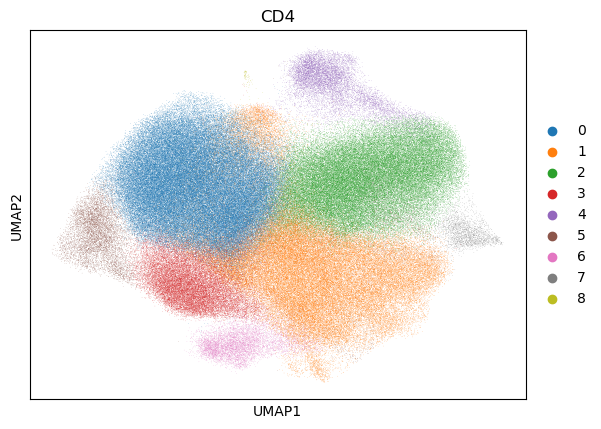

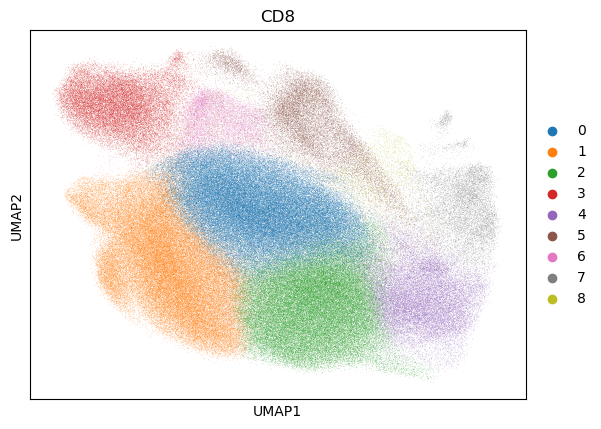

In [28]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

cd4_mask = adata.obs["cell_type"] == "CD4"
cd8_mask = adata.obs["cell_type"] == "CD8"

leiden_cd4 = run_cluster(adata[cd4_mask, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata[cd8_mask, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [29]:
clusters_wide

,cluster_CD4,cluster_CD8
P266-GGGCATCTCGTCACGG-1,3,NaN
P266-GTGCTTCCATGATCCA-1,1,NaN
P266-CGATTGACATTTCAGG-1,1,NaN
P266-GATCAGTCAATAAGCA-1,0,NaN
P266-TTTCCTCGTTATCCGA-1,0,NaN
...,...,...
P159-ACACCGGCACTACAGT-1,NaN,1
P159-CCCAATCCATGTCCTC-1,NaN,1
P159-GCGACCACATAGGATA-1,NaN,7
P159-CACATAGGTAACGCGA-1,NaN,0


In [30]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)

merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

print(df_combined.shape)
print(merged_df.shape)

merged_df

(655597, 20)
(655597, 22)


,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,...,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
P1-AAACCTGGTTGGAGGT-1,0.050863,0.419602,0.130616,-0.129579,0.573524,1.498667,-0.558390,0.358569,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
P1-AAACCTGTCTGCTTGC-1,0.038794,0.406970,0.092806,-0.166732,0.815158,1.999034,-0.481613,0.869579,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
P1-AAAGTAGGTAGGGTAC-1,0.006306,0.523353,0.097111,-0.070264,0.725720,1.804415,-0.432870,1.124728,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P97-TTGAACGCATTAGGCT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,-0.009371,0.263127,0.528017,2.091699,0.177715,0.161215,0.295282,False,NaN,2
P97-TTGTAGGAGGATGCGT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,-0.020643,0.071983,0.410903,1.436597,0.173334,-0.684533,-0.462096,False,NaN,2
P97-TTTGCGCTCAGTTCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,0.042017,0.267101,0.542824,2.131982,0.281183,0.240997,0.802787,False,NaN,1
P97-TTTGGTTAGGGTCTCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,0.129344,0.336162,0.649118,1.600566,0.226755,0.735220,-0.038821,False,NaN,2


In [31]:
pd.crosstab(merged_df['cluster_CD8'], merged_df['cell_type'],  dropna=False)


cell_type,CD4,CD8
cluster_CD8,,
NaN,307895,0
0,0,93689
1,0,78965
2,0,71083
3,0,28784
4,0,27668
5,0,21916
6,0,11015
7,0,10050


In [32]:
pd.crosstab(merged_df['cluster_CD8'], merged_df['cell_type'], dropna=False)

cell_type,CD4,CD8
cluster_CD8,,
NaN,307895,0
0,0,93689
1,0,78965
2,0,71083
3,0,28784
4,0,27668
5,0,21916
6,0,11015
7,0,10050


In [33]:
print(pos_cut_CD4, neg_cut_CD4)
print(pos_cut_CD8, neg_cut_CD8)

-0.19308589711788807 0.030715921977980586
-0.15773863001143573 -0.10023812508425992


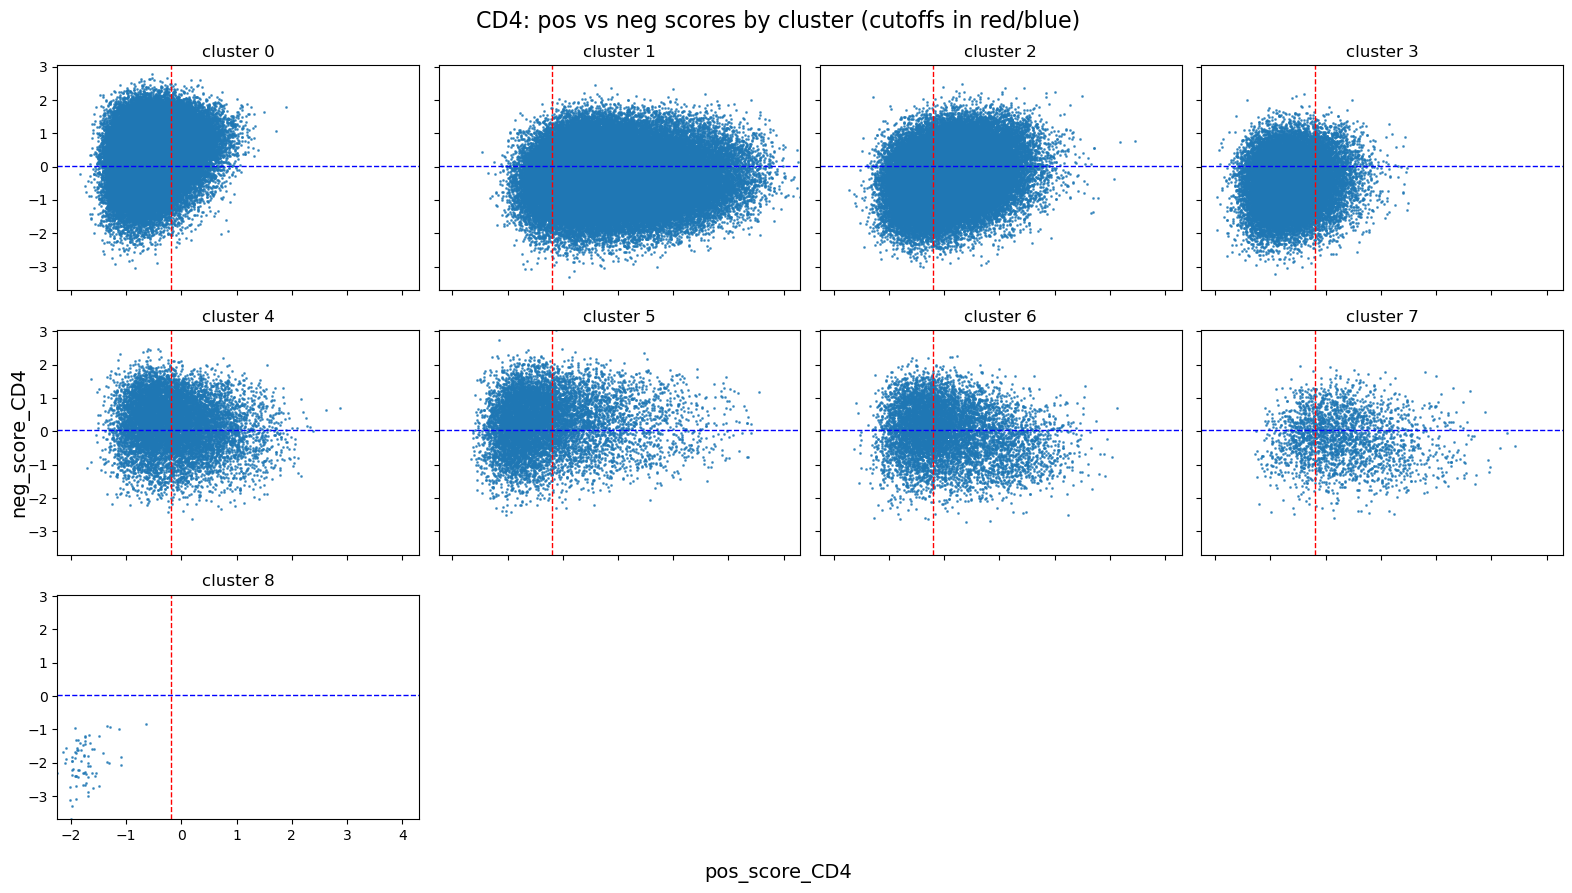

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

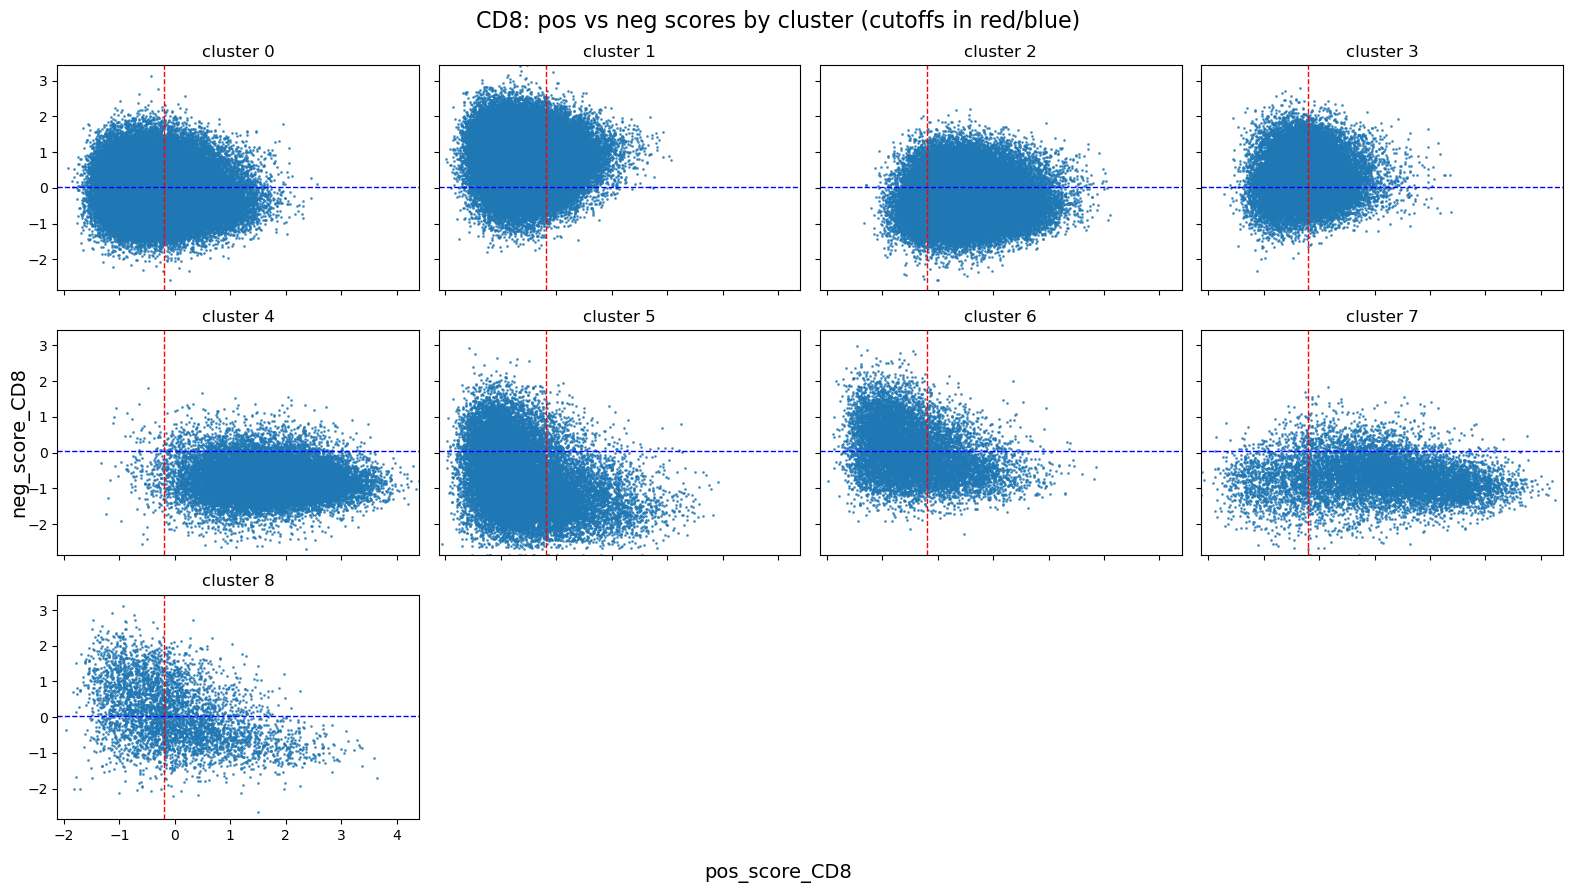

In [35]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [36]:
merged_df

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,...,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
P1-AAACCTGGTTGGAGGT-1,0.050863,0.419602,0.130616,-0.129579,0.573524,1.498667,-0.558390,0.358569,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
P1-AAACCTGTCTGCTTGC-1,0.038794,0.406970,0.092806,-0.166732,0.815158,1.999034,-0.481613,0.869579,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
P1-AAAGTAGGTAGGGTAC-1,0.006306,0.523353,0.097111,-0.070264,0.725720,1.804415,-0.432870,1.124728,False,CD4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P97-TTGAACGCATTAGGCT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,-0.009371,0.263127,0.528017,2.091699,0.177715,0.161215,0.295282,False,NaN,2
P97-TTGTAGGAGGATGCGT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,-0.020643,0.071983,0.410903,1.436597,0.173334,-0.684533,-0.462096,False,NaN,2
P97-TTTGCGCTCAGTTCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,0.042017,0.267101,0.542824,2.131982,0.281183,0.240997,0.802787,False,NaN,1
P97-TTTGGTTAGGGTCTCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,0.129344,0.336162,0.649118,1.600566,0.226755,0.735220,-0.038821,False,NaN,2


In [37]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["cell_type"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["cell_type"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,cell_type,cluster,reactive_fraction
0,CD4,0,0.034996
1,CD4,1,0.569686
2,CD4,2,0.387144
3,CD4,3,0.107994
4,CD4,4,0.212760
5,CD4,5,0.118335
6,CD4,6,0.303045
7,CD4,7,0.440896
8,CD4,8,0.000000
9,CD8,0,0.236655


In [38]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '1'), ('CD4', '7'), ('CD8', '2'), ('CD8', '4'), ('CD8', '7')}

In [39]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,...,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4,...,NaN,NaN,NaN,NaN,NaN,4,NaN,4,False,False
P1-AAACCTGGTTGGAGGT-1,0.050863,0.419602,0.130616,-0.129579,0.573524,1.498667,-0.558390,0.358569,False,CD4,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,False,False
P1-AAACCTGTCTGCTTGC-1,0.038794,0.406970,0.092806,-0.166732,0.815158,1.999034,-0.481613,0.869579,False,CD4,...,NaN,NaN,NaN,NaN,NaN,4,NaN,4,False,False
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,False,False
P1-AAAGTAGGTAGGGTAC-1,0.006306,0.523353,0.097111,-0.070264,0.725720,1.804415,-0.432870,1.124728,False,CD4,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P97-TTGAACGCATTAGGCT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,2.091699,0.177715,0.161215,0.295282,False,NaN,2,2,False,True
P97-TTGTAGGAGGATGCGT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,1.436597,0.173334,-0.684533,-0.462096,False,NaN,2,2,False,True
P97-TTTGCGCTCAGTTCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,2.131982,0.281183,0.240997,0.802787,False,NaN,1,1,False,False
P97-TTTGGTTAGGGTCTCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,1.600566,0.226755,0.735220,-0.038821,False,NaN,2,2,False,True


# Join with TCR data

In [40]:
import pandas as pd
vdj = pd.read_csv("GSE243013_T_with_TCR_annotation.csv.gz", compression='gzip')
# Check if 'cellID' column is unique
is_unique = vdj['cellID'].is_unique
print(f"'cellID' column is unique: {is_unique}")
vdj

'cellID' column is unique: True


,sampleID,cellID,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
0,P481,P481-CTCACACGTATAGTAG-1,CD4T_Treg_FOXP3,TRAV6,TRAJ37,TRAC,CALDRSSNTGKLIF,TRBV20-1,TRBJ2-7,TRBC2,CSARTSGTYEQYF,P481_clonetype_1562,non-expanded,1,other
1,P33,P33-AAAGCAACATCGGGTC-1,CD4T_Treg_CCR8,TRAV26-1,TRAJ42,TRAC,CIVRVGVGNLIF,TRBV6-1,TRBJ1-2,TRBC1,CASSESGFESYGYTF,P33_clonetype_1566,non-expanded,1,other
2,P454,P454-TATTACCGTGACAAAT-1,CD8T_Tem_GZMK+GZMH+,TRAV19,TRAJ26,TRAC,CALSEWNYGQNFVF,TRBV6-5,TRBJ2-7,TRBC2,CASSYFKWPSEEQYF,P454_clonetype_843,non-expanded,1,other
3,P58,P58-TGAGGGACACGGATAG-1,CD8T_Tm_IL7R,TRAV26-1,TRAJ49,TRAC,CIVRPFTTGNQFYF,TRBV6-5,TRBJ2-7,TRBC2,CASSYSPASSYEQYF,P58_clonetype_887,non-expanded,1,other
4,P2,P2-GTACTTTCAGGTCGTC-1,CD4T_Tn_CCR7,TRAV21,TRAJ35,TRAC,CAVSRGFGNVLHC,TRBV20-1,TRBJ2-4,TRBC2,CSARDGGAGSAKNIQYF,P2_clonetype_1571,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434453,P433,P433-AAGGTTCGTGTATGGG-1,CD4T_Treg_FOXP3,TRAV25,TRAJ54,TRAC,CAAPMGAQKLVF,TRBV29-1,TRBJ2-6,TRBC2,CSATGTGANVLTF,P433_clonetype_102,non-expanded,2,other
434454,P470,P470-TCACGAAAGGGAGTAA-1,CD4T_Tem_GZMA,TRAV13-2,TRAJ39,TRAC,CAENGNNAGNMLTF,TRBV2,TRBJ2-4,TRBC2,CASSDTTQGDIQYF,P470_clonetype_114,expanded,25,other
434455,P435,P435-AAAGTAGGTTATGCGT-1,CD8T_terminal_Tex_LAYN,TRAV1-1,TRAJ33,TRAC,CAVRGEALGSNYQLIW,TRBV7-8,TRBJ2-5,TRBC2,CASSLASGSGETQYF,P435_clonetype_26,expanded,144,expanded_terminal_Tex
434456,P394,P394-TCCCGATTCGTTTATC-1,CD4T_Tn_CCR7,TRAV23/DV6,TRAJ28,TRAC,CAASPTLPFRSYQLTF,TRBV20-1,TRBJ1-3,TRBC1,CSAAGGSSGNTIYF,P394_clonetype_2028,non-expanded,1,other


In [41]:
vdj_indexed = vdj.set_index('cellID')

df_final = (
    merged_df
    .join(vdj_indexed, how='inner')
)
df_final

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,...,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4,...,TRAC,CAYRSLRDDKIIF,TRBV6-5,TRBJ1-1,TRBC1,CASSPRAGGTEAFF,P1_clonetype_1042,non-expanded,1,other
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4,...,TRAC,CAASVAGTASKLTF,TRBV20-1,TRBJ2-5,TRBC2,CSARDDGTGERETQYF,P1_clonetype_2807,non-expanded,1,other
P1-AAAGTAGGTCAGGACA-1,0.336007,0.339035,0.160774,0.134917,0.637965,1.104264,0.592870,-0.412840,True,CD4,...,TRAC,CAGLKGANNLFF,TRBV5-1,TRBJ2-1,TRBC2,CASSLEAGGPNEQFF,P1_clonetype_417,non-expanded,2,other
P1-AAATGCCAGAGATGAG-1,0.059761,0.555703,0.207093,-0.107494,0.768528,2.430063,-0.169410,1.959730,False,CD4,...,TRAC,CAFLNTNAGKSTF,TRBV20-1,TRBJ2-7,TRBC2,CSAQGAVPYEQYF,P1_clonetype_1757,non-expanded,2,other
P1-AAATGCCTCGAACGGA-1,0.000993,0.527550,0.069433,-0.106017,0.621593,1.936293,-0.664821,1.290061,False,CD4,...,TRAC,CAVEGATNKLIF,TRBV10-2,TRBJ2-2,TRBC2,CASSLGNTGELFF,P1_clonetype_4110,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-TTGGCAATCTGAAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,TRAC,CAVEDLRRDDKIIF,TRBV7-9,TRBJ1-3,TRBC1,CASSSREVGNTIYF,P96_clonetype_486,expanded,5,other
P96-TTTATGCAGGGTTCCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,TRAC,CAVRLNTNAGKSTF,TRBV10-3,TRBJ2-7,TRBC2,CAISDGGPGAYDEQYF,P96_clonetype_546,non-expanded,2,other
P96-TTTATGCCAGTGACAG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,TRAC,CVVNQGAGSYQLTF,TRBV28,TRBJ1-5,TRBC1,CASSQRGRGNQPQHF,P96_clonetype_25,expanded,9,other
P96-TTTGTCAAGAAGGTTT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD8,...,TRAC,CAARDNAGNMLTF,TRBV10-1,TRBJ2-5,TRBC2,CASSAGTPQETQYF,P96_clonetype_31,expanded,51,other


In [42]:
out_CD4 = df_final[df_final["cell_type"]=='CD4']
out_CD8 = df_final[df_final["cell_type"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8 = out_CD8.drop(columns=['cluster'])
out_CD8

# df_final.to_csv('cell_meta_data.csv',index = True)

,cell_type,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,sampleID,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
P1-AAAGCAAGTTATCCGA-1,CD8,0.388047,0.357598,0.209754,0.545284,0.924697,1.330269,0.225775,1.598373,-0.347622,True,4,True,True,P1,CD8T_ISG15,TRAV20,TRAJ10,TRAC,CAVTRGGGNKLTF,TRBV2,TRBJ1-1,TRBC1,CASSPFWGNTEAFF,P1_clonetype_23,expanded,33,CD8Texp
P1-AACCGCGGTCAACATC-1,CD8,0.217013,0.084352,-0.088640,0.152241,0.346335,1.428823,0.578507,-0.851059,1.338838,False,0,False,False,P1,CD8T_ISG15,TRAV14/DV4,TRAJ21,TRAC,CAMREGGDNFNKFYF,TRBV6-5,TRBJ2-5,TRBC2,CASSYSILAGAPLSEETQYF,P1_clonetype_1967,expanded,8,other
P1-ACACCGGGTTCAGCGC-1,CD8,0.185942,0.073867,-0.120624,0.087692,0.279889,2.066231,0.300061,-1.140053,0.813053,False,1,False,False,P1,CD8T_ISG15,TRAV6,TRAJ20,TRAC,CALSANDYKLSF,TRBV29-1,TRBJ2-3,TRBC2,CSVEGTTAHSSTDTQYF,P1_clonetype_1186,expanded,3,other
P1-ACACCGGTCTCTGTCG-1,CD8,0.436115,0.415232,0.237969,0.553128,0.582581,1.340220,0.131251,1.525625,-0.758597,True,4,True,True,P1,CD8T_ISG15,TRAV1-2,TRAJ10,TRAC,CAVKGLTGGGNKLTF,TRBV6-2,TRBJ1-4,TRBC1,CASSYVGAGEKLFF,P1_clonetype_339,expanded,11,CD8Texp
P1-ACAGCCGTCCTAGTGA-1,CD8,0.262474,0.065633,-0.092015,0.129951,0.335791,1.986347,0.368177,-0.844579,1.027318,False,1,False,False,P1,CD8T_ISG15,TRAV13-2,TRAJ23,TRAC,CAELINYNQGGKLIF,TRBV30,TRBJ2-7,TRBC2,CAWKIGQGRQYF,P1_clonetype_2850,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-TTGGCAATCTGAAAGA-1,CD8,0.402169,0.215528,0.080648,0.262081,0.597263,1.373568,0.097628,0.426851,-0.871216,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV2,TRAJ30,TRAC,CAVEDLRRDDKIIF,TRBV7-9,TRBJ1-3,TRBC1,CASSSREVGNTIYF,P96_clonetype_486,expanded,5,other
P96-TTTATGCAGGGTTCCC-1,CD8,0.386680,0.303415,0.136634,0.319354,0.600621,1.664313,0.093574,0.735679,-0.561874,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV1-2,TRAJ27,TRAC,CAVRLNTNAGKSTF,TRBV10-3,TRBJ2-7,TRBC2,CAISDGGPGAYDEQYF,P96_clonetype_546,non-expanded,2,other
P96-TTTATGCCAGTGACAG-1,CD8,0.409536,0.249753,0.119753,0.367274,0.738316,1.645434,0.220396,0.857182,-0.016688,False,2,False,True,P96,CD8T_Trm_ZNF683,TRAV12-1,TRAJ28,TRAC,CVVNQGAGSYQLTF,TRBV28,TRBJ1-5,TRBC1,CASSQRGRGNQPQHF,P96_clonetype_25,expanded,9,other
P96-TTTGTCAAGAAGGTTT-1,CD8,0.418656,0.248997,0.147805,0.246246,0.843189,1.607317,0.191387,0.839787,-0.189189,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV13-1,TRAJ39,TRAC,CAARDNAGNMLTF,TRBV10-1,TRBJ2-5,TRBC2,CASSAGTPQETQYF,P96_clonetype_31,expanded,51,other


In [43]:
out_CD4 = out_CD4.drop(columns=['cluster'])
out_CD4


,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,cluster_CD4,cancer_reactive_per_cell,cancer_reactive_by_cluster,sampleID,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
P1-AAACCTGCAGTTTACG-1,0.066961,0.533033,0.085905,-0.044554,0.645258,1.117411,-0.372291,0.391909,False,CD4,4,False,False,P1,CD4T_Tem_GZMA,TRAV38-2/DV8,TRAJ30,TRAC,CAYRSLRDDKIIF,TRBV6-5,TRBJ1-1,TRBC1,CASSPRAGGTEAFF,P1_clonetype_1042,non-expanded,1,other
P1-AAACGGGTCCACTGGG-1,-0.006186,0.578374,0.026305,0.018373,0.754560,0.705115,-0.380682,0.113091,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV29/DV5,TRAJ44,TRAC,CAASVAGTASKLTF,TRBV20-1,TRBJ2-5,TRBC2,CSARDDGTGERETQYF,P1_clonetype_2807,non-expanded,1,other
P1-AAAGTAGGTCAGGACA-1,0.336007,0.339035,0.160774,0.134917,0.637965,1.104264,0.592870,-0.412840,True,CD4,1,True,True,P1,CD4T_Tem_GZMA,TRAV27,TRAJ36,TRAC,CAGLKGANNLFF,TRBV5-1,TRBJ2-1,TRBC2,CASSLEAGGPNEQFF,P1_clonetype_417,non-expanded,2,other
P1-AAATGCCAGAGATGAG-1,0.059761,0.555703,0.207093,-0.107494,0.768528,2.430063,-0.169410,1.959730,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV38-1,TRAJ27,TRAC,CAFLNTNAGKSTF,TRBV20-1,TRBJ2-7,TRBC2,CSAQGAVPYEQYF,P1_clonetype_1757,non-expanded,2,other
P1-AAATGCCTCGAACGGA-1,0.000993,0.527550,0.069433,-0.106017,0.621593,1.936293,-0.664821,1.290061,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV8-3,TRAJ32,TRAC,CAVEGATNKLIF,TRBV10-2,TRBJ2-2,TRBC2,CASSLGNTGELFF,P1_clonetype_4110,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-CAAGGCCAGACAATAC-1,0.251961,0.648486,0.478735,0.014112,0.717842,1.504350,0.852780,1.296985,False,CD4,4,False,False,P96,CD4T_Treg_MKI67,TRAV8-1,TRAJ21,TRAC,CAVNEYNFNKFYF,TRBV7-2,TRBJ1-2,TRBC1,CASSLMAGRGYTF,P96_clonetype_1843,non-expanded,1,other
P96-CACCAGGTCCACGTTC-1,0.167541,0.570127,0.269152,-0.151481,0.672487,1.059464,-0.043718,0.477818,False,CD4,2,False,False,P96,CD4T_Treg_MKI67,TRAV8-3,TRAJ40,TRAC,CAVGLYSGTYKYIF,TRBV6-1,TRBJ2-7,TRBC2,CASNSGSSHEQYF,P96_clonetype_698,non-expanded,2,other
P96-CTAAGACGTCTAGTCA-1,0.118938,0.354122,0.195639,-0.013513,0.665375,1.709691,-0.001075,0.329137,False,CD4,4,False,False,P96,CD4T_Treg_MKI67,TRAV12-2,TRAJ4,TRAC,CAVNPGGYNKLIF,TRBV6-1,TRBJ2-7,TRBC2,CASNLVSQAYEQYF,P96_clonetype_1445,non-expanded,1,other
P96-GCATGATAGGTGGGTT-1,0.108228,0.351331,0.178978,-0.135434,0.501039,1.313421,-0.450887,-0.127662,False,CD4,2,False,False,P96,CD4T_Treg_MKI67,TRAV8-3,TRAJ49,TRAC,CAVGATGNQFYF,TRBV15,TRBJ2-1,TRBC2,CATSRVRLGTSGYNEQFF,P96_clonetype_423,non-expanded,2,other


In [44]:
out_CD8.to_csv("cell_meta_data_CD8_cleaned.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

Prepare TCR clontype information

In [45]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,cell_type,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,sampleID,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name,cancer_reactive
P1-AAAGCAAGTTATCCGA-1,CD8,0.388047,0.357598,0.209754,0.545284,0.924697,1.330269,0.225775,1.598373,-0.347622,True,4,True,True,P1,CD8T_ISG15,TRAV20,TRAJ10,TRAC,CAVTRGGGNKLTF,TRBV2,TRBJ1-1,TRBC1,CASSPFWGNTEAFF,P1_clonetype_23,expanded,33,CD8Texp,True
P1-AACCGCGGTCAACATC-1,CD8,0.217013,0.084352,-0.088640,0.152241,0.346335,1.428823,0.578507,-0.851059,1.338838,False,0,False,False,P1,CD8T_ISG15,TRAV14/DV4,TRAJ21,TRAC,CAMREGGDNFNKFYF,TRBV6-5,TRBJ2-5,TRBC2,CASSYSILAGAPLSEETQYF,P1_clonetype_1967,expanded,8,other,False
P1-ACACCGGGTTCAGCGC-1,CD8,0.185942,0.073867,-0.120624,0.087692,0.279889,2.066231,0.300061,-1.140053,0.813053,False,1,False,False,P1,CD8T_ISG15,TRAV6,TRAJ20,TRAC,CALSANDYKLSF,TRBV29-1,TRBJ2-3,TRBC2,CSVEGTTAHSSTDTQYF,P1_clonetype_1186,expanded,3,other,False
P1-ACACCGGTCTCTGTCG-1,CD8,0.436115,0.415232,0.237969,0.553128,0.582581,1.340220,0.131251,1.525625,-0.758597,True,4,True,True,P1,CD8T_ISG15,TRAV1-2,TRAJ10,TRAC,CAVKGLTGGGNKLTF,TRBV6-2,TRBJ1-4,TRBC1,CASSYVGAGEKLFF,P1_clonetype_339,expanded,11,CD8Texp,True
P1-ACAGCCGTCCTAGTGA-1,CD8,0.262474,0.065633,-0.092015,0.129951,0.335791,1.986347,0.368177,-0.844579,1.027318,False,1,False,False,P1,CD8T_ISG15,TRAV13-2,TRAJ23,TRAC,CAELINYNQGGKLIF,TRBV30,TRBJ2-7,TRBC2,CAWKIGQGRQYF,P1_clonetype_2850,non-expanded,1,other,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-TTGGCAATCTGAAAGA-1,CD8,0.402169,0.215528,0.080648,0.262081,0.597263,1.373568,0.097628,0.426851,-0.871216,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV2,TRAJ30,TRAC,CAVEDLRRDDKIIF,TRBV7-9,TRBJ1-3,TRBC1,CASSSREVGNTIYF,P96_clonetype_486,expanded,5,other,True
P96-TTTATGCAGGGTTCCC-1,CD8,0.386680,0.303415,0.136634,0.319354,0.600621,1.664313,0.093574,0.735679,-0.561874,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV1-2,TRAJ27,TRAC,CAVRLNTNAGKSTF,TRBV10-3,TRBJ2-7,TRBC2,CAISDGGPGAYDEQYF,P96_clonetype_546,non-expanded,2,other,True
P96-TTTATGCCAGTGACAG-1,CD8,0.409536,0.249753,0.119753,0.367274,0.738316,1.645434,0.220396,0.857182,-0.016688,False,2,False,True,P96,CD8T_Trm_ZNF683,TRAV12-1,TRAJ28,TRAC,CVVNQGAGSYQLTF,TRBV28,TRBJ1-5,TRBC1,CASSQRGRGNQPQHF,P96_clonetype_25,expanded,9,other,False
P96-TTTGTCAAGAAGGTTT-1,CD8,0.418656,0.248997,0.147805,0.246246,0.843189,1.607317,0.191387,0.839787,-0.189189,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV13-1,TRAJ39,TRAC,CAARDNAGNMLTF,TRBV10-1,TRBJ2-5,TRBC2,CASSAGTPQETQYF,P96_clonetype_31,expanded,51,other,True


In [46]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'TRA_v_gene'
A_J   = 'TRA_j_gene'
A_CDR = 'TRA_cdr3'
B_V   = 'TRB_v_gene'
B_J   = 'TRB_j_gene'
B_CDR = 'TRB_cdr3'

SAMPLE = 'sampleID'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_89579/929697104.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV20,TRAJ10,CAVTRGGGNKLTF,TRBV2,TRBJ1-1,CASSPFWGNTEAFF,1.807692,-0.838966,P1,33,33,33,33
1,TRAV14/DV4,TRAJ21,CAMREGGDNFNKFYF,TRBV6-5,TRBJ2-5,CASSYSILAGAPLSEETQYF,-0.607921,1.123102,P1,8,8,0,0
2,TRAV6,TRAJ20,CALSANDYKLSF,TRBV29-1,TRBJ2-3,CSVEGTTAHSSTDTQYF,-1.140053,0.813053,P1,1,1,0,0
3,TRAV1-2,TRAJ10,CAVKGLTGGGNKLTF,TRBV6-2,TRBJ1-4,CASSYVGAGEKLFF,2.023727,-0.893994,P1,11,11,11,11
4,TRAV13-2,TRAJ23,CAELINYNQGGKLIF,TRBV30,TRBJ2-7,CAWKIGQGRQYF,-0.844579,1.027318,P1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81843,TRAV9-2,TRAJ4,CALPSGGYNKLIF,TRBV27,TRBJ1-2,CASSNLGLQFDYGYTF,-0.011635,0.148685,P96,1,1,0,0
81844,TRAV12-3,TRAJ22,CATSGSARQLTF,TRBV4-2,TRBJ2-3,CASSQSNGDTDTQYF,0.485719,0.293440,P96,1,1,0,0
81845,TRAV5,TRAJ41,CAEISDSNSGYALNF,TRBV7-8,TRBJ2-5,CASSSPPETQYF,-0.609485,1.373683,P96,1,1,0,0
81846,TRAV29/DV5,TRAJ52,CAASTGGTSYGKLTF,TRBV15,TRBJ2-5,CATSRDGDQETQYF,0.909098,-0.213410,P96,1,1,1,1


In [47]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])

In [48]:
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
19129,TRAV5,TRAJ31,CAEDNNARLMF,TRBV20-1,TRBJ1-3,CSARVGVGNTIYF,-0.122078,-0.392728,"P124,P226,P469,P47,P470,P57,P412,P595,P387",64,"2,3,1,2,27,6,2,20,1",2,"0,0,0,0,2,0,0,0,0",9
9146,TRAV3,TRAJ30,CAVRPNRDDKIIF,TRBV27,TRBJ2-3,CASSSRLAGGTDTQYF,-0.216446,0.577572,"P102,P257,P412,P59,P6,P106,P209",103,"1,1,2,1,25,71,2",0,"0,0,0,0,0,0,0",7
17311,TRAV8-3,TRAJ44,CAVGAGTGTASKLTF,TRBV5-5,TRBJ2-3,CASSLELAGGRDTQYF,0.161195,0.671941,"P58,P67,P268,P53,P205,P337,P380",15,"2,1,1,1,3,6,1",1,"0,0,0,0,0,0,1",7
18514,TRAV35,TRAJ28,CAGPGAGSYQLTF,TRBV27,TRBJ2-2,CASSFPNTGELFF,-0.535725,1.047892,"P115,P303,P525,P281,P321,P399,P420",13,"1,2,2,2,1,1,4",0,"0,0,0,0,0,0,0",7
12008,TRAV13-1,TRAJ40,CAATSTSGTYKYIF,TRBV13,TRBJ2-1,CASSLGQGQFF,-0.192755,-0.209140,"P389,P270,P277,P337,P482,P567",71,"8,8,3,50,1,1",1,"0,0,0,1,0,0",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81843,TRAV9-2,TRAJ4,CALPSGGYNKLIF,TRBV27,TRBJ1-2,CASSNLGLQFDYGYTF,-0.011635,0.148685,P96,1,1,0,0,1
81844,TRAV12-3,TRAJ22,CATSGSARQLTF,TRBV4-2,TRBJ2-3,CASSQSNGDTDTQYF,0.485719,0.293440,P96,1,1,0,0,1
81845,TRAV5,TRAJ41,CAEISDSNSGYALNF,TRBV7-8,TRBJ2-5,CASSSPPETQYF,-0.609485,1.373683,P96,1,1,0,0,1
81846,TRAV29/DV5,TRAJ52,CAASTGGTSYGKLTF,TRBV15,TRBJ2-5,CATSRDGDQETQYF,0.909098,-0.213410,P96,1,1,1,1,1


In [49]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [50]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_89579/809582251.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD4,mean_neg_score_CD4,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
14052,TRAV20,TRAJ26,CAVRRDNYGQNFVF,TRBV6-1,TRBJ1-2,CASREDGYTF,0.138317,0.289670,"P481,P494,P304,P339,P486,P587,P218",8,"1,1,1,1,1,2,1",0,"0,0,0,0,0,0,0",7
2162,TRAV25,TRAJ36,CAGDTGANNLFF,TRBV6-2,TRBJ2-5,CASSYGETQYF,-0.212750,0.601589,"P137,P234,P340,P9,P107,P205",8,"1,1,1,3,1,1",0,"0,0,0,0,0,0",6
8135,TRAV6,TRAJ8,CALLNTGFQKLVF,TRBV10-3,TRBJ1-2,CAISDEGNYGYTF,0.889917,0.916782,"P329,P58,P273,P127",6,"1,1,3,1",0,"0,0,0,0",4
384,TRAV13-1,TRAJ48,CAASRNFGNEKLTF,TRBV19,TRBJ1-2,CASSPSGVNYGYTF,-0.296555,0.477843,"P103,P322,P199,P454",4,"1,1,1,1",0,"0,0,0,0",4
2568,TRAV13-1,TRAJ17,CAARKGAAGNKLTF,TRBV24-1,TRBJ2-3,CATSDSTTDTQYF,0.469575,0.888070,"P158,P226,P130,P494",4,"1,1,1,1",0,"0,0,0,0",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173501,TRAV6,TRAJ23,CALPPGGKLIF,TRBV12-4,TRBJ2-6,CASSRGRLQGANVLTF,0.458779,0.870252,P93,1,1,0,0,1
173502,TRAV13-1,TRAJ7,CAALGPGGGNNRLAF,TRBV11-2,TRBJ1-1,CASSLYRGTEAFF,-0.410789,0.838026,P93,1,1,0,0,1
173503,TRAV8-1,TRAJ21,CAVNEYNFNKFYF,TRBV7-2,TRBJ1-2,CASSLMAGRGYTF,0.852780,1.296985,P96,1,1,0,0,1
173504,TRAV12-2,TRAJ4,CAVNPGGYNKLIF,TRBV6-1,TRBJ2-7,CASNLVSQAYEQYF,-0.001075,0.329137,P96,1,1,0,0,1


In [51]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)